
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each with a diagonal covariance matrix with diagonal elements being 0.1. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.

2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Develop a Python class named 'KNeighbourClassifier' that encapsulates the hyperparameters of a K-Nearest Neighbors (KNN) classifier, such as the number of neighbors (k) and the distance metric. Implement the following methods within this class. $\textit{fit(X_train, y_train):}$ This method should accept training data (X_train) and corresponding labels (y_train) as input. It should store these inputs as internal attributes of the class for later use in prediction. $\textit{predict(X_test):} This method should take test data (X_test) as input and return the predicted labels for the given data points using the KNN algorithm.

2. Instantiate an object of the KNeighbourClassifier class. Train the classifier on the provided training data by calling the fit() method. Use this trained classifier to predict the labels of the test data. Finally, evaluate the classifier's accuracy by comparing the predicted labels with the actual (original) labels of the test data

3. Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels do not match their true labels.

4. Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions

<b> Part(c): Parameter selection: What is good value for k? - </b> A common approach to finding the optimal value for the hyperparameter 'k' in K-Nearest Neighbors is through cross-validation. In this method, a portion (ρ%) of the training data is set aside as a validation set. The KNN model is then trained on the remaining data and evaluated on the validation set for a range of 'k' values. The optimal 'k' is selected as the value that results in the best performance on the validation set.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification error over the result of Part (b).

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

2. Investigate how the distribution of the training data affects the performance of the KNN algorithm. Replace the Gaussian distribution used in part (a) with a Laplacian distribution. Generate both training and testing datasets based on these distributions. Evaluate the KNN classifier's performance on both datasets. Analyze whether the KNN achieves comparable performance with both Gaussian and Laplacian distributed data. Examine the effect of changing the distance metric from $l_{2}$ to $l_{1}$ on the KNN performance for both Gaussian and Laplacian distributed datasets


<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> :

1. Use the above written KNN classifier to perform digit claissification using MNIST digit dataset.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%. The 28x28 images in the MNIST data set may be flattened to arrive at a 784 dimensional vector.
3. Use the most suitable distance metric and k to maximize the test data performance.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.



In [8]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

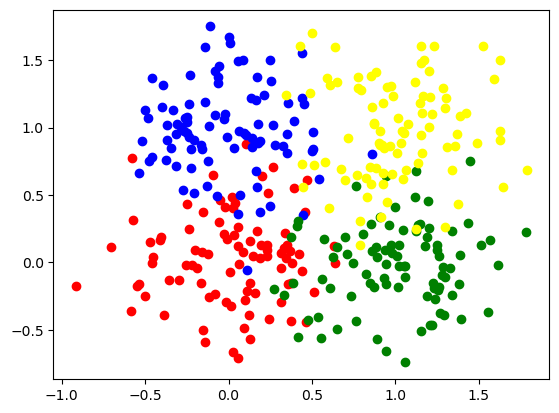

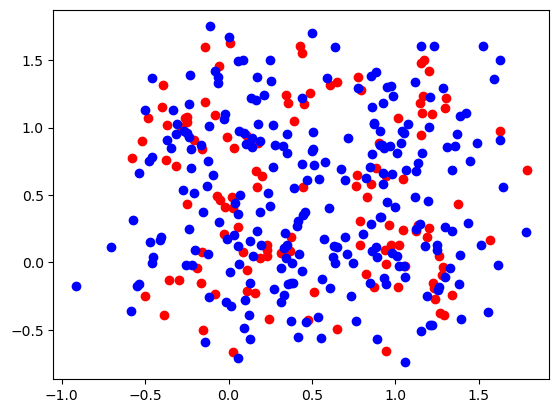

In [9]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances  
mean1 = np.array([0, 0])
mean2 = np.array([0, 1])
mean3 = np.array([1, 0])
mean4 = np.array([1, 1])
cov = np.array([[0.1, 0], [0, 0.1]])

#Sample data points from the bivariate Gaussian distribution

#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
#class 1
X1 = np.random.multivariate_normal(mean1, cov, 90)
#class 2
X2 = np.random.multivariate_normal(mean2, cov, 90)
#class 3
X3 = np.random.multivariate_normal(mean3, cov, 90)
#class 4
X4 = np.random.multivariate_normal(mean4, cov, 90)
#now, make them in a scatter plot to visualize the data
plt.scatter(X1[:,0],X1[:,1],color='red')
plt.scatter(X2[:,0],X2[:,1],color='blue')
plt.scatter(X3[:,0],X3[:,1],color='green')
plt.scatter(X4[:,0],X4[:,1],color='yellow')
plt.show()

#Generate training data
X1_train = X1[:30]
X2_train = X2[:30]
X3_train = X3[:30]
X4_train = X4[:30]
X_train = np.concatenate((X1_train, X2_train, X3_train, X4_train), axis=0)
y_train = np.concatenate((np.ones(30), -np.ones(30), -np.ones(30), np.ones(30)), axis=0)

#Generate testing data
X1_test = X1[30:]
X2_test = X2[30:]
X3_test = X3[30:]
X4_test = X4[30:]
X_test = np.concatenate((X1_test, X2_test, X3_test, X4_test), axis=0)
y_test = np.concatenate((np.ones(60), -np.ones(120),np.ones(60)), axis=0)

#Visualize the data using plt.scatter() function
plt.scatter(X_train[:,0],X_train[:,1],color='red')
plt.scatter(X_test[:,0],X_test[:,1],color='blue')
plt.show()







87.91666666666667


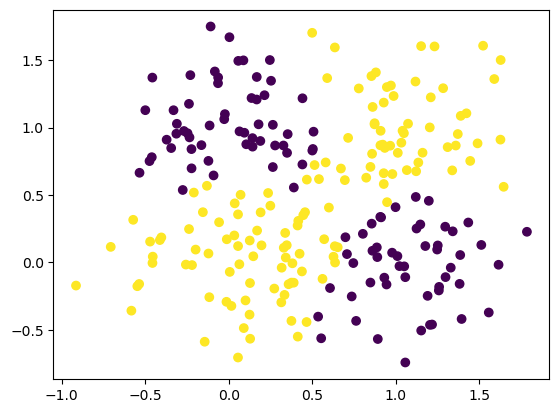

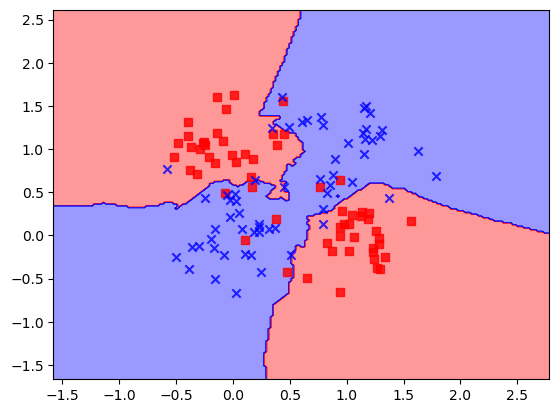

In [10]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function

class KNeighborsClassifier:
    """
    K-Nearest Neighbors Classifier
    This class implements the k-nearest neighbors algorithm for classification.
    """
    def __init__(self, n_neighbors=5, distance_metric="l2"):
        # Initializes the KNeighborsClassifier with the specified number of neighbors. Defaults to 5.
        # Default distance_metric is L2 norm (Euclidean distance)

        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        # This method fits the k-nearest neighbors classifier from the training data.
        # X_train is the training data, represented as a numpy array of shape (n_samples, n_features)
        # y_train is the target values of the training data, represented as a numpy array of shape (n_samples,)
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        # This method predicts the class labels for a set of data samples.
        # X_test is the data to be predicted, represented as a numpy array of shape (n_samples, n_features)
        prediction_array = []
        for i in range(X_test.shape[0]):
            distances = self._compute_distances(X_test[i])
            nearest_neighbors_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_neighbors_labels = self.y_train[nearest_neighbors_indices]
            unique, counts = np.unique(nearest_neighbors_labels, return_counts=True)
            prediction = unique[np.argmax(counts)]
            prediction_array.append(prediction)
        return np.array(prediction_array)

    def _compute_distances(self, x_test):
        # This method computes the distances between a test sample and all training samples
        if self.distance_metric == "l2":
            distances = np.sqrt(np.sum((self.X_train - x_test) ** 2, axis=1))
        elif self.distance_metric == "l1" or "manhattan":
            distances = np.sum(np.abs(self.X_train - x_test), axis=1)
        else:
            raise ValueError("Unsupported distance metric")
        return distances

#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
    #Inputs : Ground truth and predicted labels
    #Outputs : Portion of data points that are correctly classified, i.e., accuracy
    correct=0
    for i in range(len(true)):
        if true[i]==pred[i]:
            correct+=1  
    return correct/len(true)


#Create a visual representation of predictions
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions=knn.predict(X_test)
accuracy=KNNAccuracy(y_test,predictions)
print(100*accuracy)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions)
plt.show()

#Generate and visualize the decision regions and overlay the test points
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = np.array(classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl)

plot_decision_regions(X_train, y_train, knn)
plt.show()



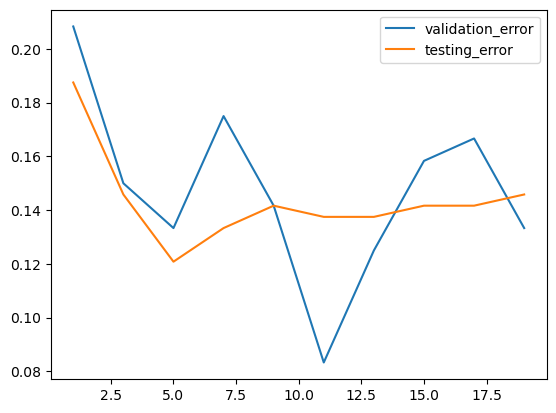

11


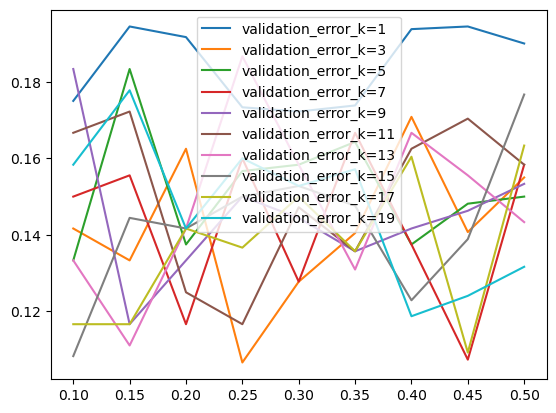

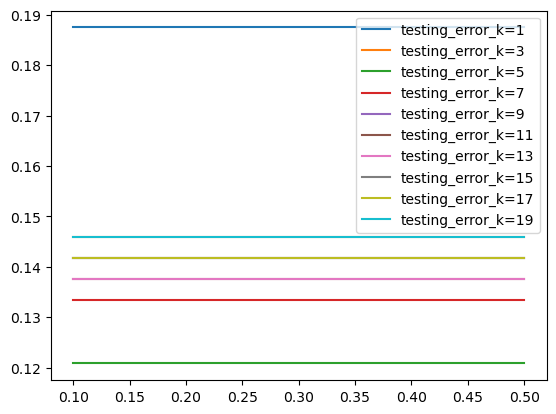

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


86.25


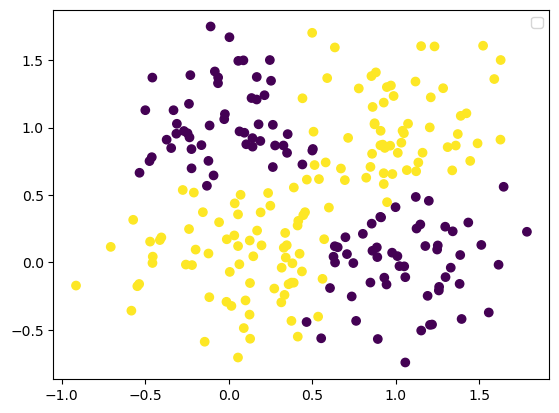

In [11]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range, rho, X_train, y_train, X_test, y_test, distance_metric="l2"):
  # Iterate through range of k values
  # Hold out rho fraction of training data in each repetition.
  validation_errors = []
  testing_errors = []
  for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, distance_metric=distance_metric)
    validation_error = 0
    for i in range(10):
      number_of_validation_samples = int(rho * X_train.shape[0])
      indices_for_validation = random.sample(range(X_train.shape[0]), number_of_validation_samples)
      random.seed()
      X_validation = X_train[indices_for_validation]
      y_validation = y_train[indices_for_validation]
      X_new_train = np.delete(X_train, indices_for_validation, axis=0)
      y_new_train = np.delete(y_train, indices_for_validation, axis=0)
      knn.fit(X_new_train, y_new_train)
      predictions = knn.predict(X_validation)
      accuracy = KNNAccuracy(y_validation, predictions)
      validation_error += 1 - accuracy
    validation_errors.append(validation_error / 10)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = KNNAccuracy(y_test, predictions)
    testing_errors.append(1 - accuracy)
  # Return errors on training and validation data
  return validation_errors, testing_errors

#Plot training and validation errors for different values of k

k_range = range(1, 21,2)
validation_errors,testing_errors=holdoutCVkNN(k_range,0.1,X_train,y_train,X_test,y_test)
plt.plot(k_range, validation_errors, label='validation_error')
plt.plot(k_range, testing_errors, label='testing_error')
plt.legend()
plt.show()

#what is the best value for k?
best_k=k_range[np.argmin(validation_errors)]
print(best_k)


#Effect of rho on k
different_rho = np.arange(0.1,0.55,0.05)
validation_errors_new=[]
testing_errors_new=[]
#with different rho, find the optimal k and plot it too based on validation and testing errors
#write code here
for rho in different_rho:
    validation_errors, testing_errors = holdoutCVkNN(k_range, rho, X_train, y_train, X_test, y_test)
    validation_errors_new.append(validation_errors)
    testing_errors_new.append(testing_errors)
validation_errors_new = np.array(validation_errors_new)
testing_errors_new = np.array(testing_errors_new)
for i in range(validation_errors_new.shape[1]):
    plt.plot(different_rho, validation_errors_new[:, i], label=f'validation_error_k={k_range[i]}')
plt.legend()
plt.show()

for i in range(testing_errors_new.shape[1]):
    plt.plot(different_rho, testing_errors_new[:, i], label=f'testing_error_k={k_range[i]}')
plt.legend()
plt.show()


#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
predictions=knn.predict(X_test)
accuracy=KNNAccuracy(y_test,predictions)
print(100*accuracy)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions)
plt.legend()
plt.show()





Accuracies for Gaussian data with L2 distance: [0.9, 0.8708333333333333, 0.8895833333333333, 0.8944444444444445, 0.8791666666666667, 0.8975]
Array of best ks: [17, 9, 9, 13, 7, 17]
Array of best ks with L1 distance: [11, 11, 7, 19, 9, 11]
Accuracies for Gaussian data with L1 distance: [0.9, 0.8708333333333333, 0.8854166666666666, 0.8944444444444445, 0.878125, 0.8966666666666666]
Accuracies for Laplacian data with L2 distance: [0.85, 0.825, 0.8083333333333333, 0.8305555555555556, 0.8072916666666666, 0.8125]
Array of best ks (Laplacian, L2 distance): [17, 17, 15, 21, 13, 13]
Array of best ks with L1 distance (Laplacian): [13, 17, 17, 19, 9, 5]
Accuracies for Laplacian data with L1 distance: [0.825, 0.8083333333333333, 0.7979166666666667, 0.8277777777777777, 0.809375, 0.8075]


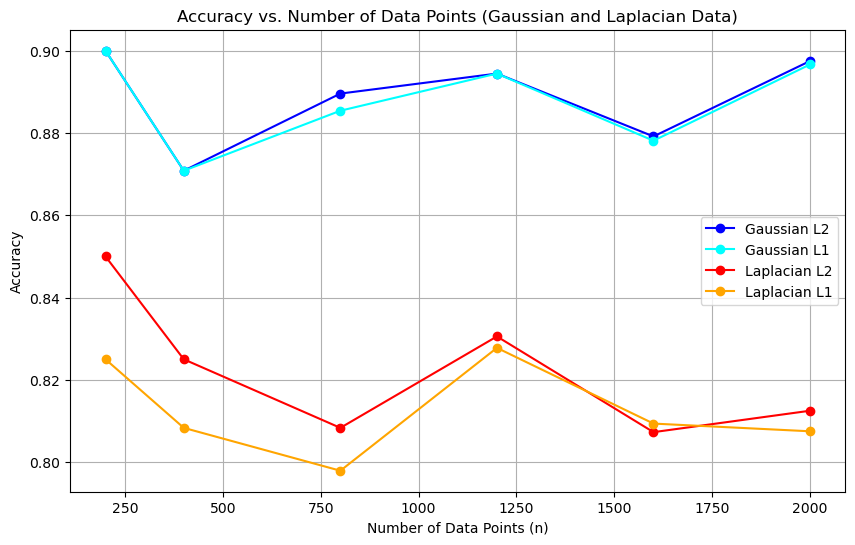

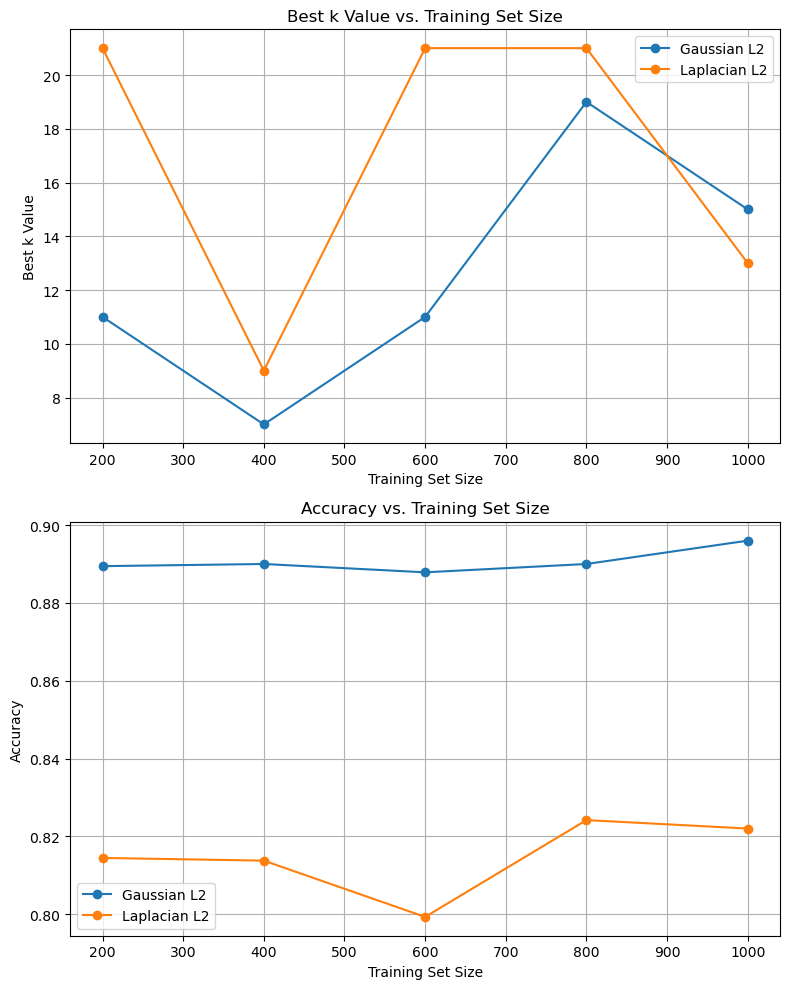

In [12]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################```
#Performance evaluation as n increases
#as done in first question, write a function to generate n number of data points with each class having n/4 data points and make class 1 and class 3 as y=1 and other 2 as y=-1 
def generate_data(n,delta):
    mean1 = [0, 0]
    mean2 = [0, 1]
    mean3 = [1, 0]
    mean4 = [1, 1]
    cov = [[0.1, 0], [0, 0.1]]
    
    X1 = np.random.multivariate_normal(mean1, cov, int(n/4))
    X2 = np.random.multivariate_normal(mean2, cov, int(n/4))
    X3 = np.random.multivariate_normal(mean3, cov, int(n/4))
    X4 = np.random.multivariate_normal(mean4, cov, int(n/4))
    
    X = np.concatenate((X1, X2, X3, X4), axis=0)
    y = np.concatenate((np.ones(int(n/4)), -np.ones(int(n/2)), np.ones(int(n/4))), axis=0)
    
    # Calculate the number of training samples
    num_train_samples = int(n * delta)
    num_test_samples = n - num_train_samples
    X1_train = X1[:int(num_train_samples/4)]
    X2_train = X2[:int(num_train_samples/4)]
    X3_train = X3[:int(num_train_samples/4)]
    X4_train = X4[:int(num_train_samples/4)]
    X_train = np.concatenate((X1_train, X2_train, X3_train, X4_train), axis=0)
    y_train = np.concatenate((np.ones(int(num_train_samples/4)), -np.ones(int(num_train_samples/4)), -np.ones(int(num_train_samples/4)), np.ones(int(num_train_samples/4))), axis=0)

    #Generate testing data
    X1_test = X1[int(num_train_samples/4):]
    X2_test = X2[int(num_train_samples/4):]
    X3_test = X3[int(num_train_samples/4):]
    X4_test = X4[int(num_train_samples/4):]
    X_test = np.concatenate((X1_test, X2_test, X3_test, X4_test), axis=0)
    y_test = np.concatenate((np.ones(int(num_test_samples/4)), -np.ones(int(num_test_samples/2)), np.ones(int(num_test_samples/4))), axis=0) 
    return X_train, X_test, y_train, y_test

def generate_laplacian_data(n, delta):
    mean1 = [0, 0]
    mean2 = [0, 1]
    mean3 = [1, 0]
    mean4 = [1, 1]
    scale = np.sqrt(0.1) # scale parameter for Laplacian distribution

    X1 = np.random.laplace(mean1, scale, (int(n/4), 2))
    X2 = np.random.laplace(mean2, scale, (int(n/4), 2))
    X3 = np.random.laplace(mean3, scale, (int(n/4), 2))
    X4 = np.random.laplace(mean4, scale, (int(n/4), 2))

    X = np.concatenate((X1, X2, X3, X4), axis=0)
    y = np.concatenate((np.ones(int(n/4)), -np.ones(int(n/2)), np.ones(int(n/4))), axis=0)

    # Calculate the number of training samples
    num_train_samples = int(n * delta)
    num_test_samples = n - num_train_samples
    X1_train = X1[:int(num_train_samples/4)]
    X2_train = X2[:int(num_train_samples/4)]
    X3_train = X3[:int(num_train_samples/4)]
    X4_train = X4[:int(num_train_samples/4)]
    X_train = np.concatenate((X1_train, X2_train, X3_train, X4_train), axis=0)
    y_train = np.concatenate((np.ones(int(num_train_samples/4)), -np.ones(int(num_train_samples/4)), -np.ones(int(num_train_samples/4)), np.ones(int(num_train_samples/4))), axis=0)

    # Generate testing data
    X1_test = X1[int(num_train_samples/4):]
    X2_test = X2[int(num_train_samples/4):]
    X3_test = X3[int(num_train_samples/4):]
    X4_test = X4[int(num_train_samples/4):]
    X_test = np.concatenate((X1_test, X2_test, X3_test, X4_test), axis=0)
    y_test = np.concatenate((np.ones(int(num_test_samples/4)), -np.ones(int(num_test_samples/2)), np.ones(int(num_test_samples/4))), axis=0)
    return X_train, X_test, y_train, y_test
    
n_values = [200, 400, 800, 1200, 1600, 2000]
delta = 0.4  # Fraction of data to be used for training


data_dict_gaussian = {}
for n in n_values:
    X_train, X_test, y_train, y_test = generate_data(n, delta)
    data_dict_gaussian[n] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }
best_ks_gaussian_l2 = []
for n in n_values:
    X_train, X_test, y_train, y_test = data_dict_gaussian[n]['X_train'], data_dict_gaussian[n]['X_test'], data_dict_gaussian[n]['y_train'], data_dict_gaussian[n]['y_test']
    k_range = range(1, 22, 2)
    validation_errors, testing_errors = holdoutCVkNN(k_range, 0.1, X_train, y_train, X_test, y_test)
    best_k = k_range[np.argmin(validation_errors)]
    best_ks_gaussian_l2.append(best_k)
    #print(f"Best k for n={n}: {best_k}")

accuracies_gaussian_l2 = []
for n in n_values:
    X_train, X_test, y_train, y_test = data_dict_gaussian[n]['X_train'], data_dict_gaussian[n]['X_test'], data_dict_gaussian[n]['y_train'], data_dict_gaussian[n]['y_test']
    best_k = best_ks_gaussian_l2[n_values.index(n)]
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = KNNAccuracy(y_test, predictions)
    accuracies_gaussian_l2.append(accuracy)
    #print(f"Accuracy for n={n} with best k={best_k} (L2 distance): {100 * accuracy:.2f}%")

print("Accuracies for Gaussian data with L2 distance:", accuracies_gaussian_l2)
"""plt.plot(n_values, accuracies_gaussian_l2, marker='o')
plt.xlabel('Number of Data Points (n)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Data Points (Gaussian Data, L2 Distance)')
plt.grid(True)
plt.show()"""
print("Array of best ks:", best_ks_gaussian_l2)
"""plt.plot(n_values, best_ks_gaussian_l2, marker='o')
plt.xlabel('Number of Data Points (n)')
plt.ylabel('Best k Value')
plt.title('Best k Value vs. Number of Data Points')
plt.grid(True)
plt.show()"""

# Perform the same procedure with L1 distance metric
best_ks_gaussian_l1 = []
for n in n_values:
    X_train, X_test, y_train, y_test = data_dict_gaussian[n]['X_train'], data_dict_gaussian[n]['X_test'], data_dict_gaussian[n]['y_train'], data_dict_gaussian[n]['y_test']
    k_range = range(1, 21, 2)
    validation_errors, testing_errors = holdoutCVkNN(k_range, 0.1, X_train, y_train, X_test, y_test, distance_metric="l1")
    best_k = k_range[np.argmin(validation_errors)]
    best_ks_gaussian_l1.append(best_k)
    #print(f"Best k for n={n} with L1 distance: {best_k}")

print("Array of best ks with L1 distance:", best_ks_gaussian_l1)
"""plt.plot(n_values, best_ks_gaussian_l1, marker='o')
plt.xlabel('Number of Data Points (n)')
plt.ylabel('Best k Value')
plt.title('Best k Value vs. Number of Data Points (L1 Distance)')
plt.grid(True)
plt.show()"""
accuracies_gaussian_l1 = []
for n in n_values:
    X_train, X_test, y_train, y_test = data_dict_gaussian[n]['X_train'], data_dict_gaussian[n]['X_test'], data_dict_gaussian[n]['y_train'], data_dict_gaussian[n]['y_test']
    best_k = best_ks_gaussian_l1[n_values.index(n)]
    knn = KNeighborsClassifier(n_neighbors=best_k, distance_metric="l1")
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = KNNAccuracy(y_test, predictions)
    accuracies_gaussian_l1.append(accuracy)
    #print(f"Accuracy for n={n} with best k={best_k} (L1 distance): {100 * accuracy:.2f}%")

print("Accuracies for Gaussian data with L1 distance:", accuracies_gaussian_l1)
"""plt.plot(n_values, accuracies_gaussian_l1, marker='o')
plt.xlabel('Number of Data Points (n)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Data Points (Gaussian Data, L1 Distance)')
plt.grid(True)
plt.show()"""
# Perform the same procedure for Laplacian data
data_dict_laplacian = {}
for n in n_values:
    X_train, X_test, y_train, y_test = generate_laplacian_data(n, delta)
    data_dict_laplacian[n] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

# Find the best k values for Laplacian data with L2 distance
best_ks_laplacian_l2 = []
for n in n_values:
    X_train, X_test, y_train, y_test = data_dict_laplacian[n]['X_train'], data_dict_laplacian[n]['X_test'], data_dict_laplacian[n]['y_train'], data_dict_laplacian[n]['y_test']
    k_range = range(1, 22, 2)
    validation_errors, testing_errors = holdoutCVkNN(k_range, 0.1, X_train, y_train, X_test, y_test)
    best_k = k_range[np.argmin(validation_errors)]
    best_ks_laplacian_l2.append(best_k)
    #print(f"Best k for n={n} (Laplacian, L2 distance): {best_k}")

# Evaluate the performance for Laplacian data with L2 distance
accuracies_laplacian_l2 = []
for n in n_values:
    X_train, X_test, y_train, y_test = data_dict_laplacian[n]['X_train'], data_dict_laplacian[n]['X_test'], data_dict_laplacian[n]['y_train'], data_dict_laplacian[n]['y_test']
    best_k = best_ks_laplacian_l2[n_values.index(n)]
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = KNNAccuracy(y_test, predictions)
    accuracies_laplacian_l2.append(accuracy)
    #print(f"Accuracy for n={n} with best k={best_k} (Laplacian, L2 distance): {100 * accuracy:.2f}%")

print("Accuracies for Laplacian data with L2 distance:", accuracies_laplacian_l2)
"""plt.plot(n_values, accuracies_laplacian_l2, marker='o')
plt.xlabel('Number of Data Points (n)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Data Points (Laplacian Data, L2 Distance)')
plt.grid(True)
plt.show()"""
print("Array of best ks (Laplacian, L2 distance):", best_ks_laplacian_l2)
"""plt.plot(n_values, best_ks_laplacian_l2, marker='o')
plt.xlabel('Number of Data Points (n)')
plt.ylabel('Best k Value')
plt.title('Best k Value vs. Number of Data Points (Laplacian Data, L2 Distance)')
plt.grid(True)
plt.show()"""

# Perform the same procedure with L1 distance metric for Laplacian data
best_ks_laplacian_l1 = []
for n in n_values:
    X_train, X_test, y_train, y_test = data_dict_laplacian[n]['X_train'], data_dict_laplacian[n]['X_test'], data_dict_laplacian[n]['y_train'], data_dict_laplacian[n]['y_test']
    k_range = range(1, 21, 2)
    validation_errors, testing_errors = holdoutCVkNN(k_range, 0.1, X_train, y_train, X_test, y_test, distance_metric="l1")
    best_k = k_range[np.argmin(validation_errors)]
    best_ks_laplacian_l1.append(best_k)
    #print(f"Best k for n={n} with L1 distance (Laplacian): {best_k}")

print("Array of best ks with L1 distance (Laplacian):", best_ks_laplacian_l1)
"""plt.plot(n_values, best_ks_laplacian_l1, marker='o')
plt.xlabel('Number of Data Points (n)')
plt.ylabel('Best k Value')
plt.title('Best k Value vs. Number of Data Points (Laplacian Data, L1 Distance)')
plt.grid(True)
plt.show()"""

# Evaluate the performance for Laplacian data with L1 distance
accuracies_laplacian_l1 = []
for n in n_values:
    X_train, X_test, y_train, y_test = data_dict_laplacian[n]['X_train'], data_dict_laplacian[n]['X_test'], data_dict_laplacian[n]['y_train'], data_dict_laplacian[n]['y_test']
    best_k = best_ks_laplacian_l1[n_values.index(n)]
    knn = KNeighborsClassifier(n_neighbors=best_k, distance_metric="l1")
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = KNNAccuracy(y_test, predictions)
    accuracies_laplacian_l1.append(accuracy)
    #print(f"Accuracy for n={n} with best k={best_k} (Laplacian, L1 distance): {100 * accuracy:.2f}%")

print("Accuracies for Laplacian data with L1 distance:", accuracies_laplacian_l1)
"""plt.plot(n_values, accuracies_laplacian_l1, marker='o')
plt.xlabel('Number of Data Points (n)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Data Points (Laplacian Data, L1 Distance)')
plt.grid(True)
plt.show()"""

# Compare Gaussian and Laplacian distributions in the same plot
plt.figure(figsize=(10, 6))

# Plot accuracies for Gaussian data with L2 distance
plt.plot(n_values, accuracies_gaussian_l2, marker='o', label='Gaussian L2', color='blue')

# Plot accuracies for Gaussian data with L1 distance
plt.plot(n_values, accuracies_gaussian_l1, marker='o', label='Gaussian L1', color='cyan')

# Plot accuracies for Laplacian data with L2 distance
plt.plot(n_values, accuracies_laplacian_l2, marker='o', label='Laplacian L2', color='red')

# Plot accuracies for Laplacian data with L1 distance
plt.plot(n_values, accuracies_laplacian_l1, marker='o', label='Laplacian L1', color='orange')

plt.xlabel('Number of Data Points (n)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Data Points (Gaussian and Laplacian Data)')
plt.grid(True)
plt.legend()
plt.show()


# Fix the total size of the dataset
total_size = 2000
train_sizes = [200, 400, 600, 800, 1000]
delta_values = [size / total_size for size in train_sizes]

# Store the best k values and accuracies for different training sizes
best_ks_gaussian_l2 = []
accuracies_gaussian_l2 = []
best_ks_laplacian_l2 = []
accuracies_laplacian_l2 = []

# Evaluate for Gaussian data
for delta in delta_values:
    X_train, X_test, y_train, y_test = generate_data(total_size, delta)
    k_range = range(1, 22, 2)
    validation_errors, testing_errors = holdoutCVkNN(k_range, 0.1, X_train, y_train, X_test, y_test)
    best_k = k_range[np.argmin(validation_errors)]
    best_ks_gaussian_l2.append(best_k)
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = KNNAccuracy(y_test, predictions)
    accuracies_gaussian_l2.append(accuracy)

# Evaluate for Laplacian data
for delta in delta_values:
    X_train, X_test, y_train, y_test = generate_laplacian_data(total_size, delta)
    k_range = range(1, 22, 2)
    validation_errors, testing_errors = holdoutCVkNN(k_range, 0.1, X_train, y_train, X_test, y_test)
    best_k = k_range[np.argmin(validation_errors)]
    best_ks_laplacian_l2.append(best_k)
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = KNNAccuracy(y_test, predictions)
    accuracies_laplacian_l2.append(accuracy)

# Plot the best k values and accuracies for different training sizes in subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot the best k values for different training sizes
axs[0].plot(train_sizes, best_ks_gaussian_l2, marker='o', label='Gaussian L2')
axs[0].plot(train_sizes, best_ks_laplacian_l2, marker='o', label='Laplacian L2')
axs[0].set_xlabel('Training Set Size')
axs[0].set_ylabel('Best k Value')
axs[0].set_title('Best k Value vs. Training Set Size')
axs[0].grid(True)
axs[0].legend()

# Plot the accuracies for different training sizes
axs[1].plot(train_sizes, accuracies_gaussian_l2, marker='o', label='Gaussian L2')
axs[1].plot(train_sizes, accuracies_laplacian_l2, marker='o', label='Laplacian L2')
axs[1].set_xlabel('Training Set Size')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy vs. Training Set Size')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()



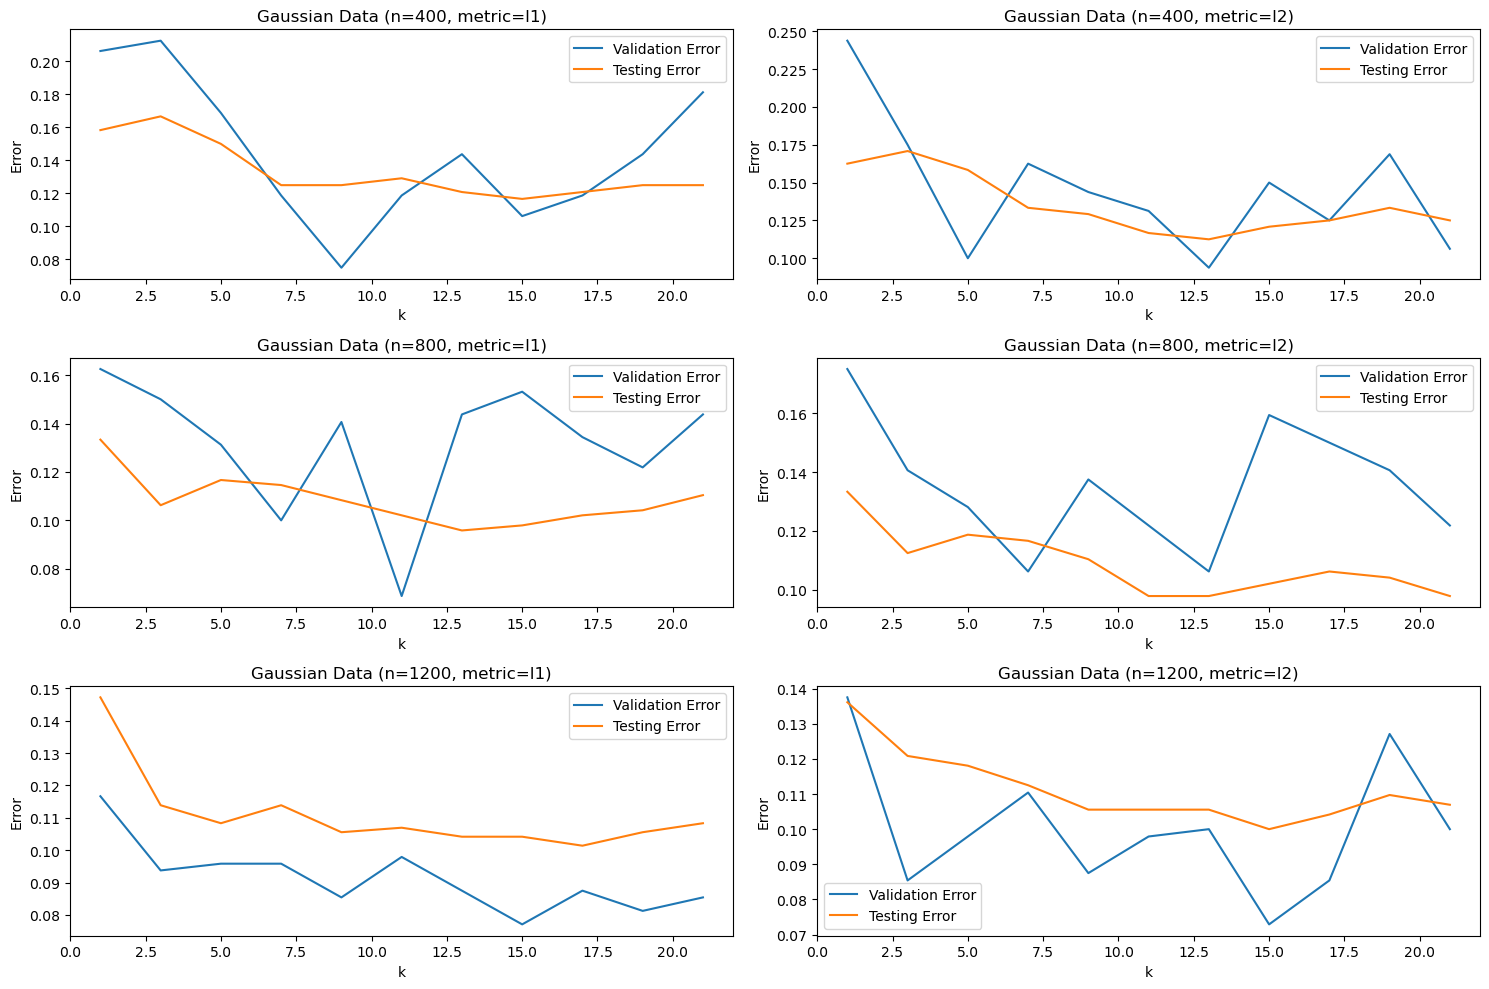

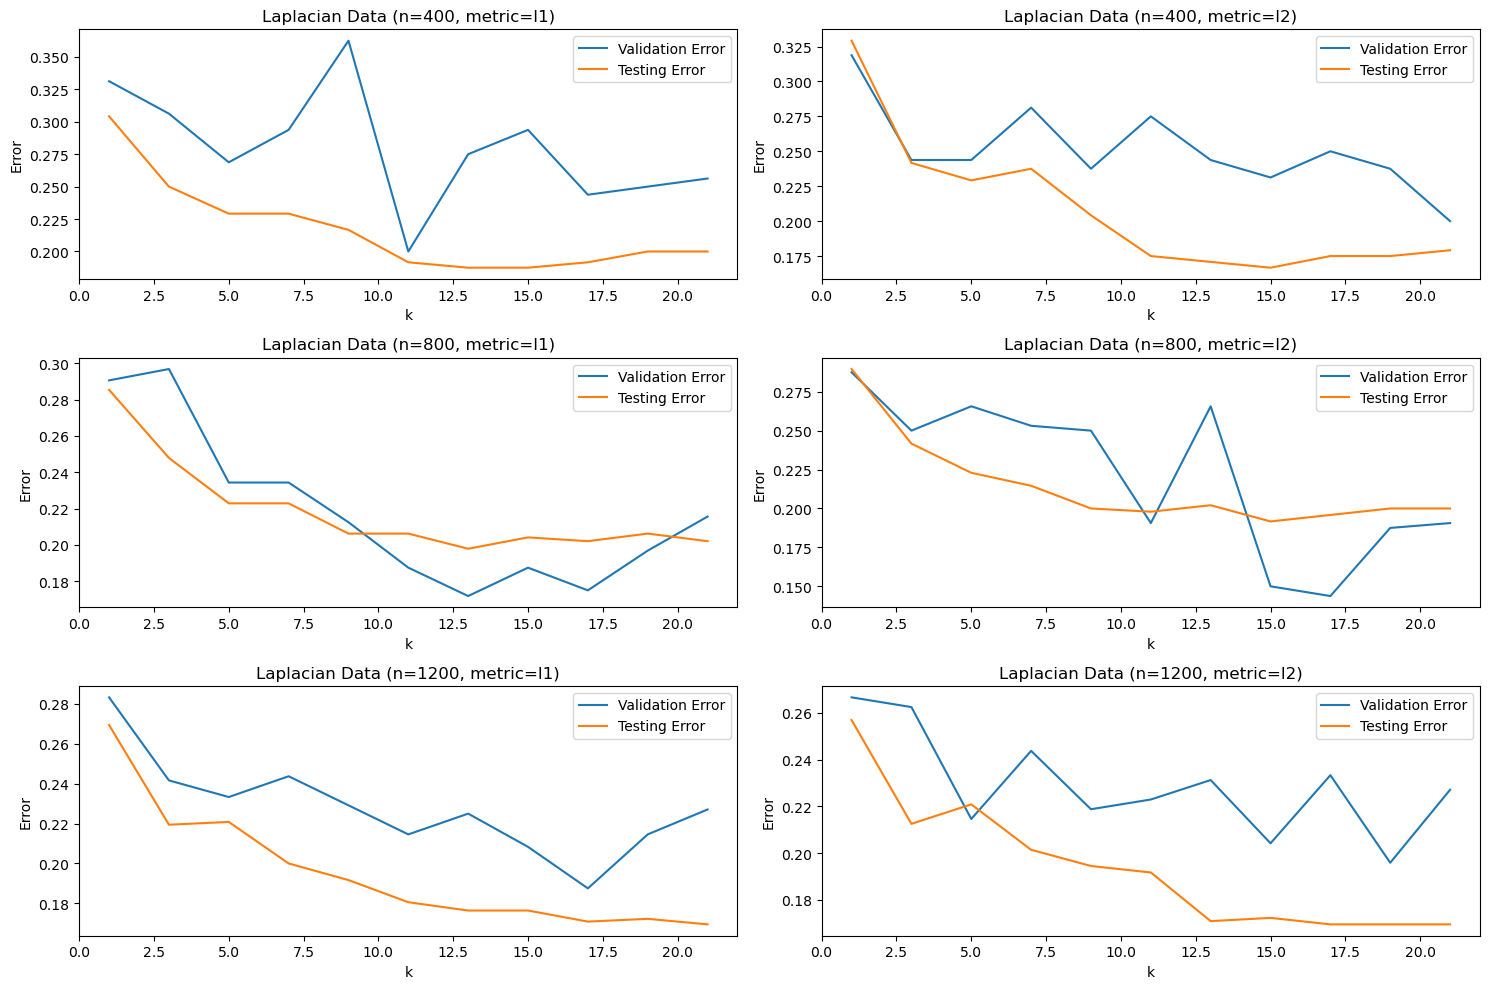

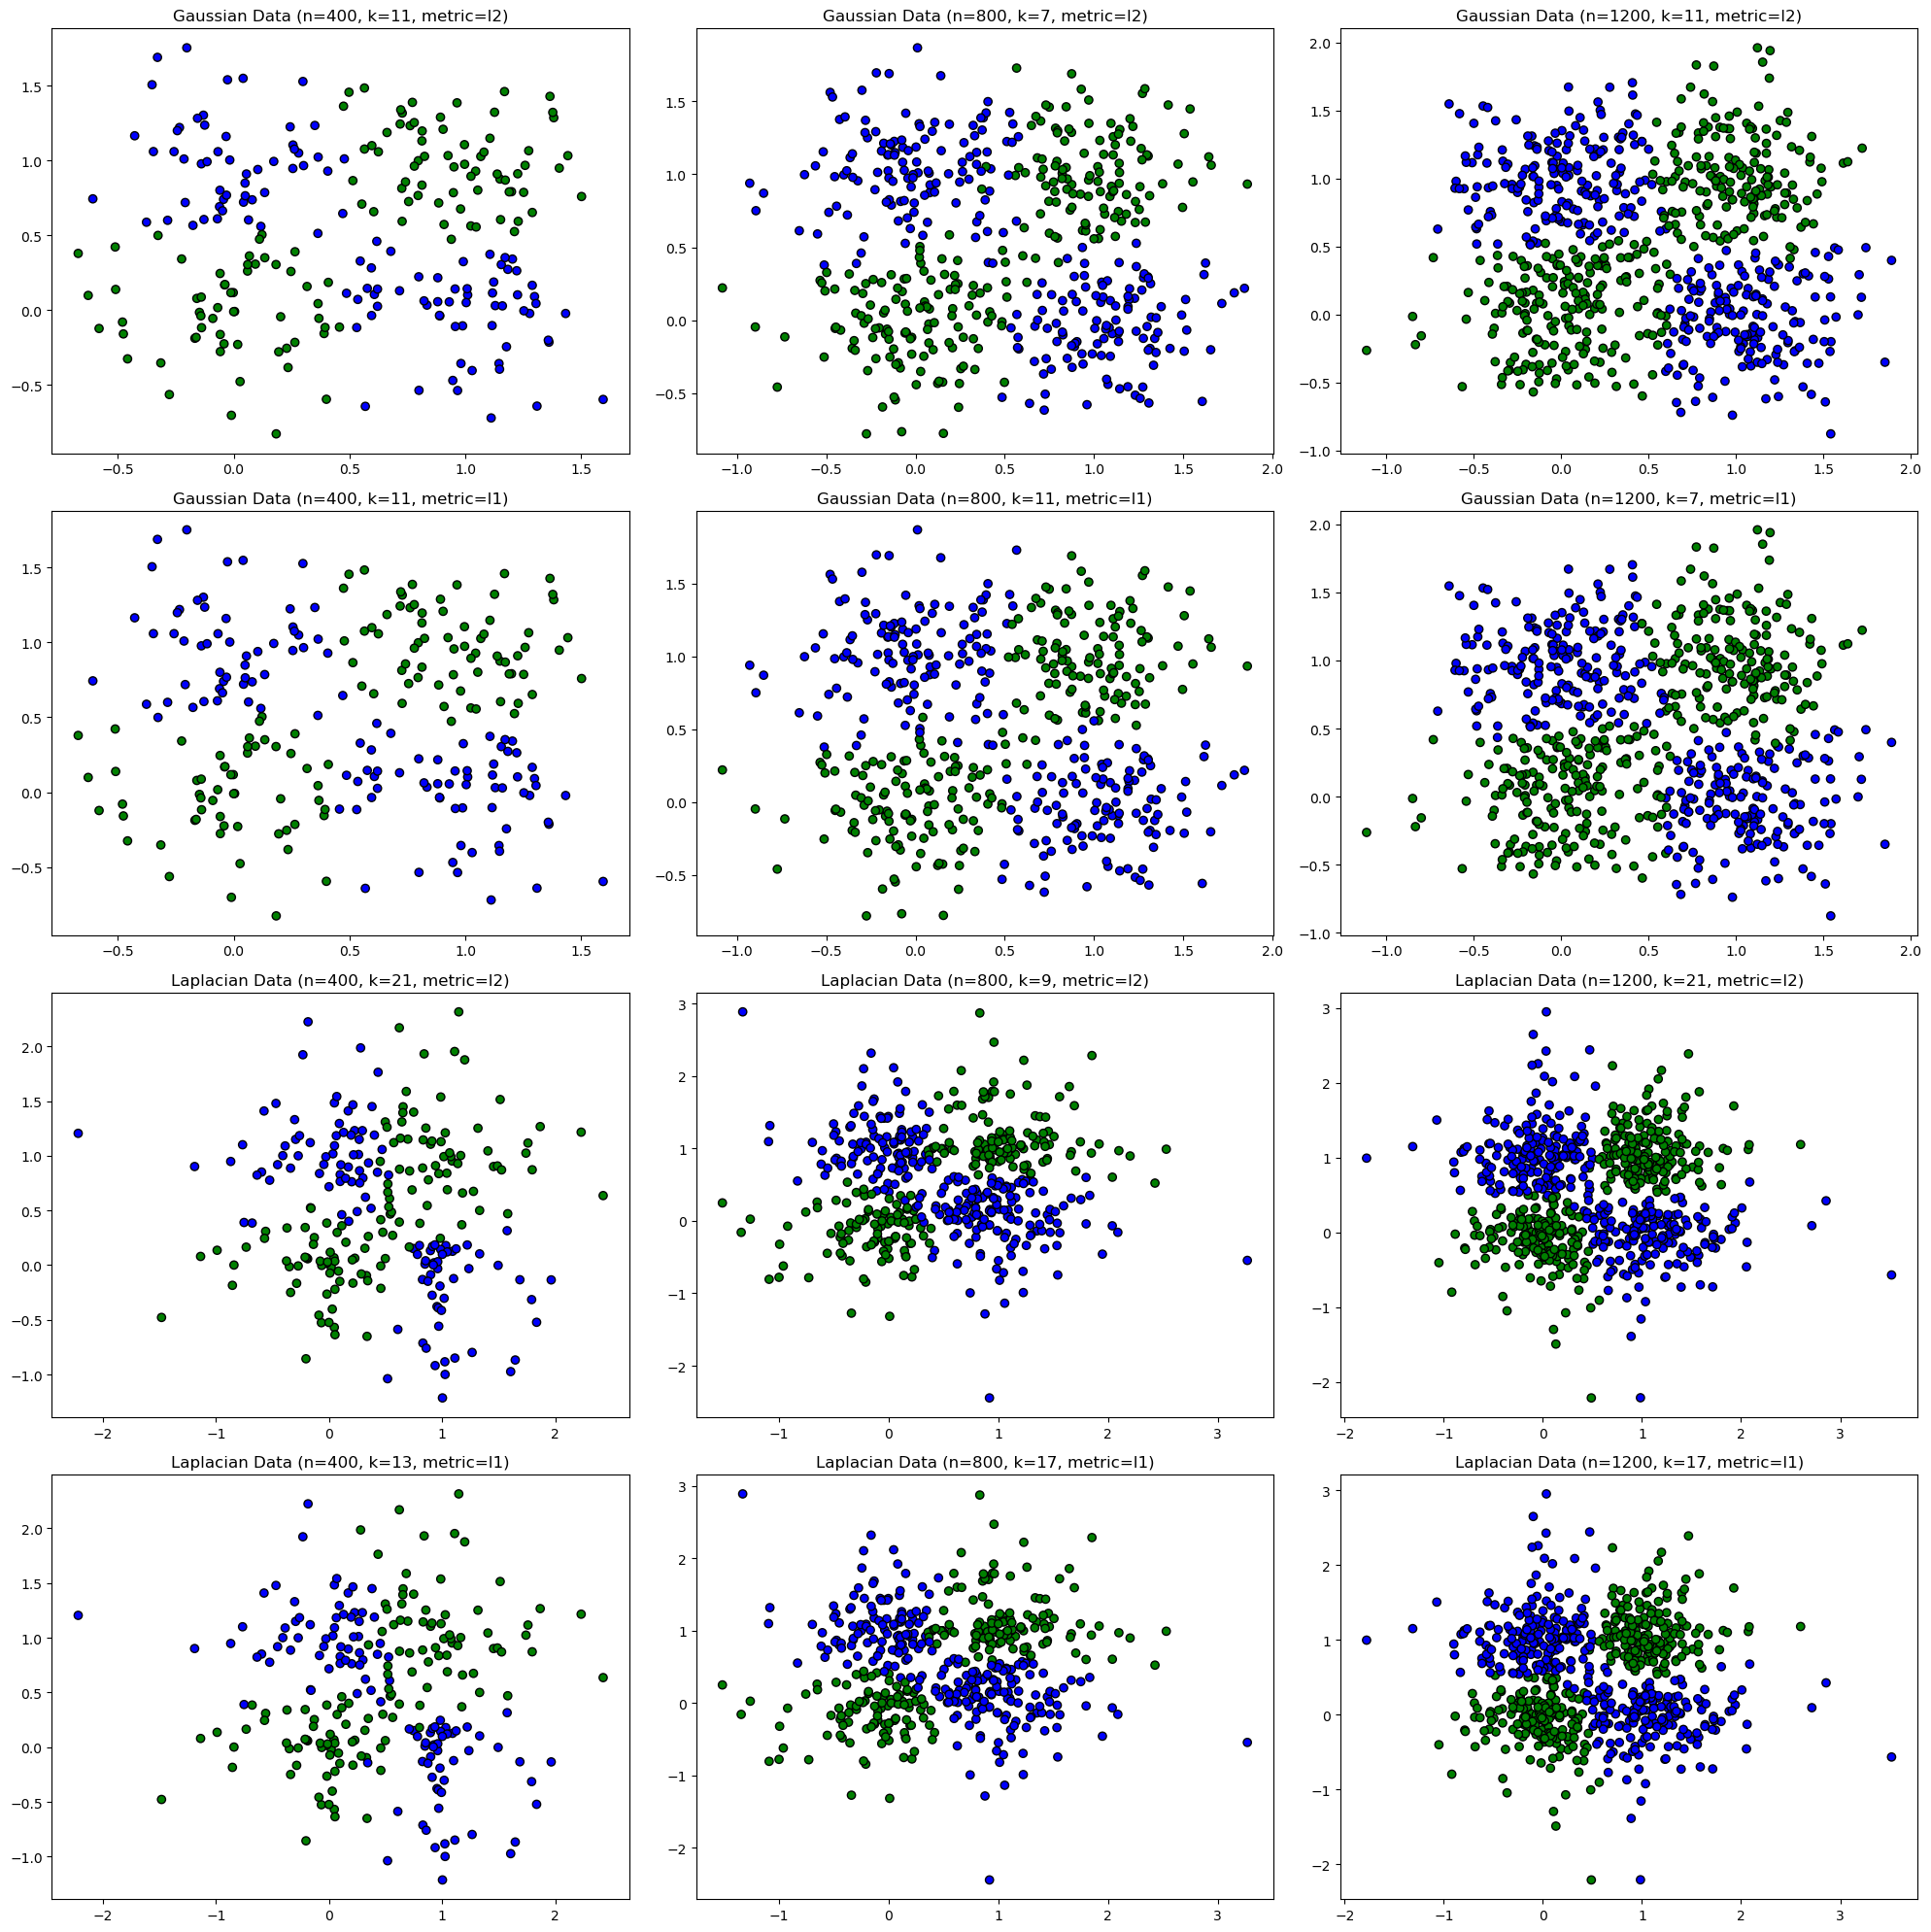

Accuracy: 87.08%


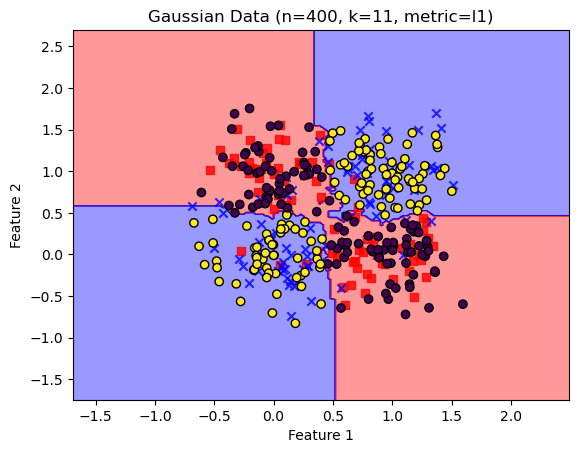

Accuracy: 88.33%


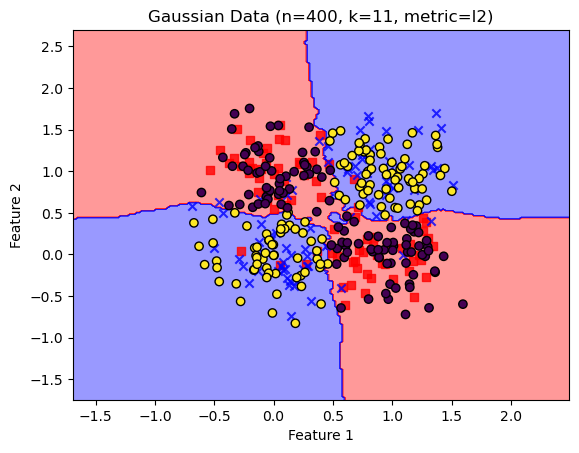

Accuracy: 89.79%


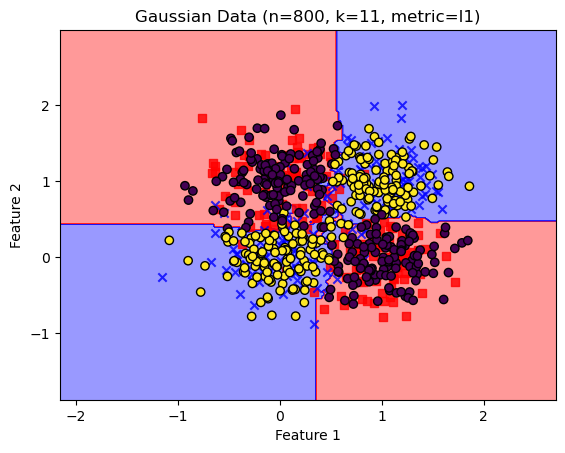

Accuracy: 88.33%


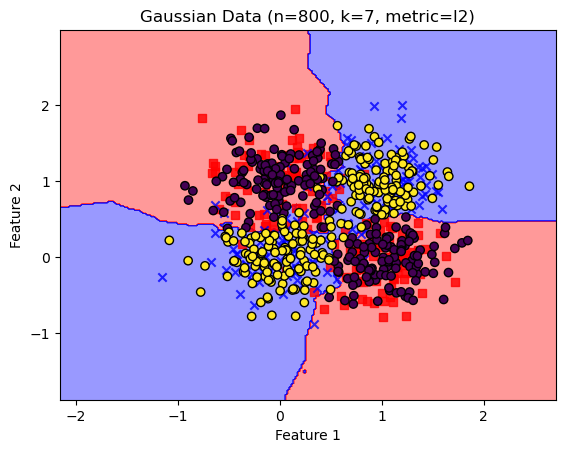

Accuracy: 88.61%


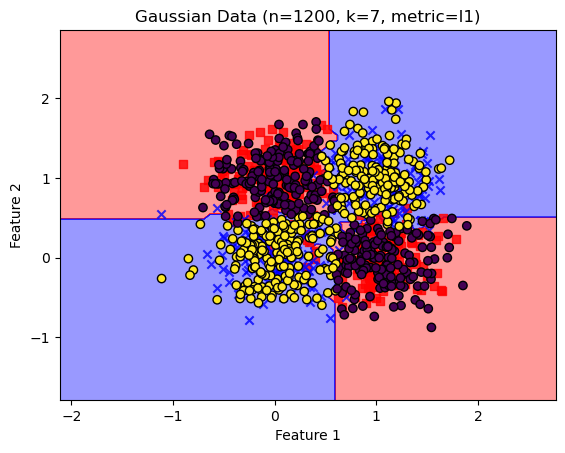

Accuracy: 89.44%


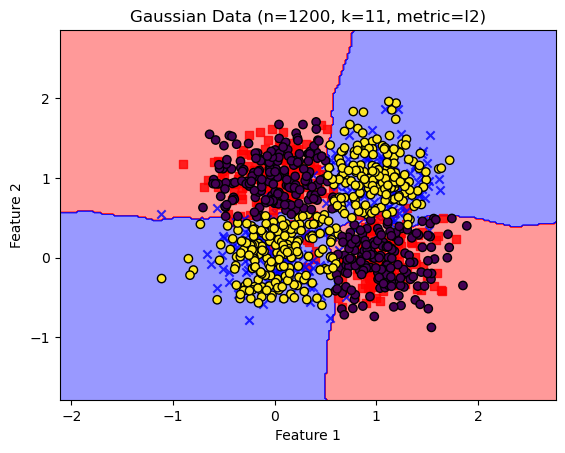

Accuracy: 81.25%


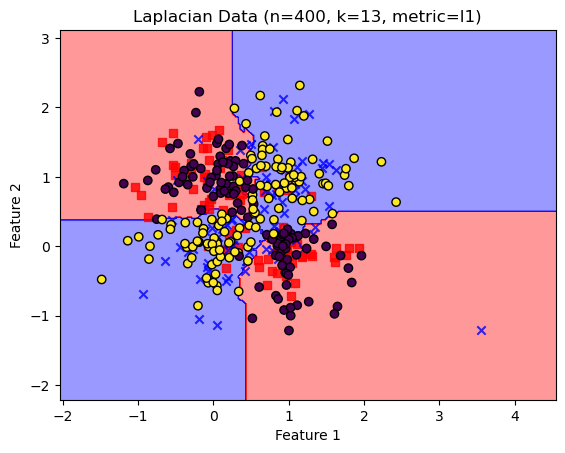

Accuracy: 82.08%


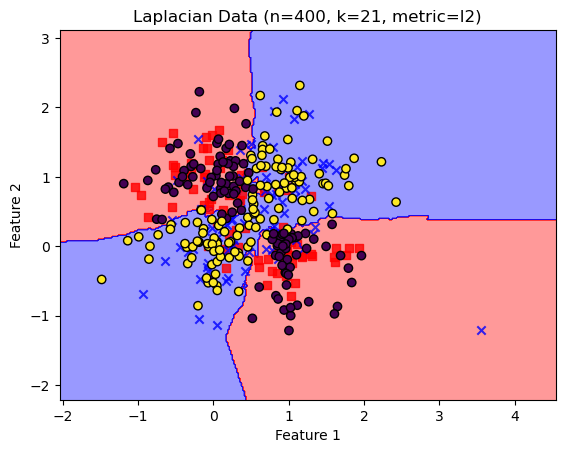

Accuracy: 79.79%


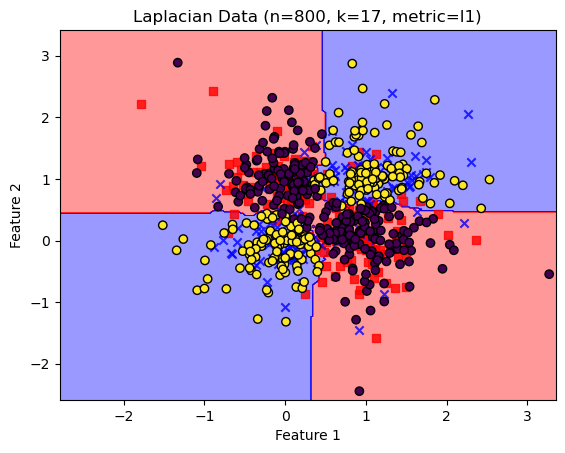

Accuracy: 80.00%


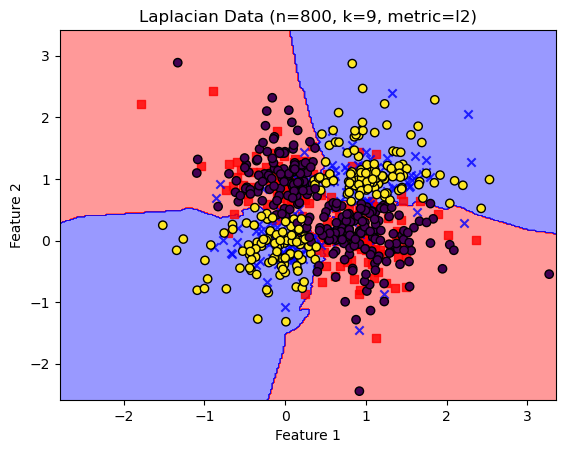

Accuracy: 82.92%


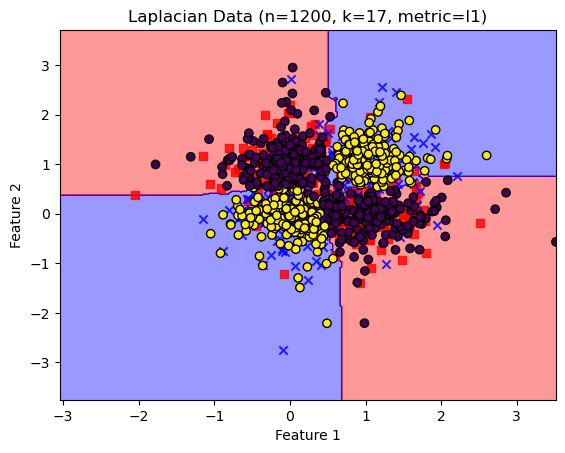

Accuracy: 83.06%


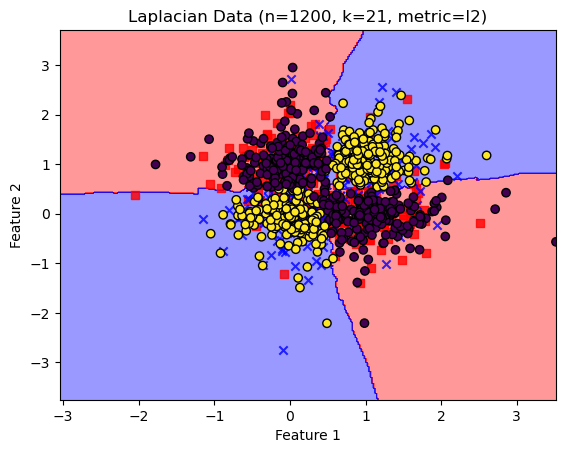

In [13]:
##################################
#Part(e): Influence of distance metric on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance metric
# Generate data and plot validation errors and training errors
def plot_decision_boundaries(X_train, y_train, X_test, y_test, best_k, distance_metric,title_given):
    knn = KNeighborsClassifier(n_neighbors=best_k, distance_metric=distance_metric)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = KNNAccuracy(y_test, predictions)
    print(f"Accuracy: {100 * accuracy:.2f}%")
    
    plot_decision_regions(X_train, y_train, knn)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, edgecolor='k', marker='o')
    plt.title(title_given)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
n_values = [400, 800, 1200]
distance_metrics = ['l1', 'l2']
fig, axs = plt.subplots(len(n_values), len(distance_metrics), figsize=(15, 10))
# Plot for Gaussian data
for i, n in enumerate(n_values):
    # Gaussian data with L2 distance
    # Gaussian data with L2 distance
    # Gaussian data with L2 distance
    for j, metric in enumerate(distance_metrics):
        X_train, y_train = data_dict_gaussian[n]['X_train'], data_dict_gaussian[n]['y_train']
        X_test, y_test = data_dict_gaussian[n]['X_test'], data_dict_gaussian[n]['y_test']
        k_range = range(1, 22, 2)
        validation_errors, testing_errors = holdoutCVkNN(k_range, 0.1, X_train, y_train, X_test, y_test, distance_metric=metric)
        
        axs[i, j].plot(k_range, validation_errors, label='Validation Error')
        axs[i, j].plot(k_range, testing_errors, label='Testing Error')
        axs[i, j].set_title(f'Gaussian Data (n={n}, metric={metric})')
        axs[i, j].set_xlabel('k')
        axs[i, j].set_ylabel('Error')
        axs[i, j].legend()

plt.tight_layout()
plt.show()

# Plot for Laplacian data
fig, axs = plt.subplots(len(n_values), len(distance_metrics), figsize=(15, 10))

for i, n in enumerate(n_values):
    for j, metric in enumerate(distance_metrics):
        X_train, y_train = data_dict_laplacian[n]['X_train'], data_dict_laplacian[n]['y_train']
        X_test, y_test = data_dict_laplacian[n]['X_test'], data_dict_laplacian[n]['y_test']
        k_range = range(1, 22, 2)
        validation_errors, testing_errors = holdoutCVkNN(k_range, 0.1, X_train, y_train, X_test, y_test, distance_metric=metric)
        
        axs[i, j].plot(k_range, validation_errors, label='Validation Error')
        axs[i, j].plot(k_range, testing_errors, label='Testing Error')
        axs[i, j].set_title(f'Laplacian Data (n={n}, metric={metric})')
        axs[i, j].set_xlabel('k')
        axs[i, j].set_ylabel('Error')
        axs[i, j].legend()

plt.tight_layout()
plt.show()


# Plot scatter plots for Gaussian and Laplacian data for the best_ks using KNN in different subplots
fig, axs = plt.subplots(4, len(n_values), figsize=(20, 20))

for i, n in enumerate(n_values):
    # Gaussian data with L2 distance
    X_train, y_train = data_dict_gaussian[n]['X_train'], data_dict_gaussian[n]['y_train']
    X_test, y_test = data_dict_gaussian[n]['X_test'], data_dict_gaussian[n]['y_test']
    best_k = best_ks_gaussian_l2[i]
    knn = KNeighborsClassifier(n_neighbors=best_k, distance_metric='l2')
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    axs[0, i].scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=ListedColormap(['blue', 'green']), edgecolor='k')
    axs[0, i].set_title(f'Gaussian Data (n={n}, k={best_k}, metric=l2)')
    
    # Gaussian data with L1 distance
    best_k = best_ks_gaussian_l1[i]
    knn = KNeighborsClassifier(n_neighbors=best_k, distance_metric='l1')
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    axs[1, i].scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=ListedColormap(['blue', 'green']), edgecolor='k')
    axs[1, i].set_title(f'Gaussian Data (n={n}, k={best_k}, metric=l1)')
    
    # Laplacian data with L2 distance
    X_train, y_train = data_dict_laplacian[n]['X_train'], data_dict_laplacian[n]['y_train']
    X_test, y_test = data_dict_laplacian[n]['X_test'], data_dict_laplacian[n]['y_test']
    best_k = best_ks_laplacian_l2[i]
    knn = KNeighborsClassifier(n_neighbors=best_k, distance_metric='l2')
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    axs[2, i].scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=ListedColormap(['blue', 'green']), edgecolor='k')
    axs[2, i].set_title(f'Laplacian Data (n={n}, k={best_k}, metric=l2)')
    
    # Laplacian data with L1 distance
    best_k = best_ks_laplacian_l1[i]
    knn = KNeighborsClassifier(n_neighbors=best_k, distance_metric='l1')
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    axs[3, i].scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=ListedColormap(['blue', 'green']), edgecolor='k')
    axs[3, i].set_title(f'Laplacian Data (n={n}, k={best_k}, metric=l1)')

plt.tight_layout()
plt.show()

#Understand the decision regions of KNN classifier with different distance metric

for i, n in enumerate(n_values):
    for metric in distance_metrics:
        best_k = best_ks_gaussian_l2[i] if metric == 'l2' else best_ks_gaussian_l1[i]
        X_train, y_train = data_dict_gaussian[n]['X_train'], data_dict_gaussian[n]['y_train']
        X_test, y_test = data_dict_gaussian[n]['X_test'], data_dict_gaussian[n]['y_test']
        plot_decision_boundaries(X_train, y_train, X_test, y_test, best_k, metric,f'Gaussian Data (n={n}, k={best_k}, metric={metric})')

for i, n in enumerate(n_values):
    for metric in distance_metrics:
        best_k = best_ks_laplacian_l2[i] if metric == 'l2' else best_ks_laplacian_l1[i]
        X_train, y_train = data_dict_laplacian[n]['X_train'], data_dict_laplacian[n]['y_train']
        X_test, y_test = data_dict_laplacian[n]['X_test'], data_dict_laplacian[n]['y_test']
        plot_decision_boundaries(X_train, y_train, X_test, y_test, best_k, metric,f'Laplacian Data (n={n}, k={best_k}, metric={metric})')



Training set size: 1600
Validation set size: 200
Test set size: 200
Best k: 3, Best Distance Metric: l2, Best Accuracy: 0.89
Test Accuracy: 0.925
Confusion Matrix:
[[15  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0]
 [ 0  3 21  0  0  0  0  0  1  0]
 [ 1  0  1 16  0  0  0  0  0  2]
 [ 0  0  0  0 27  0  0  0  0  1]
 [ 0  0  0  0  1 13  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0]
 [ 0  3  0  0  0  0  0 16  0  1]
 [ 0  0  0  0  0  0  0  0 15  1]
 [ 0  0  0  0  0  0  0  0  0 18]]


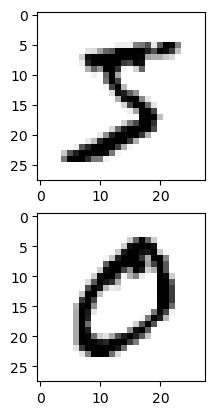

In [14]:
##################################
#Part(f): MNIST Digit classification using KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
number_of_samples=2000
#Create train, validation and test splits
train_size = 0.8
validation_size = 0.1
test_size = 0.1
# Normalize the images
images = images / 255.0
# Using  only 2000 images for less computation time
images = images[:number_of_samples]
targets = targets[:number_of_samples]
# Shuffle the data
indices = np.arange(images.shape[0])
np.random.shuffle(indices)
images = images[indices]
targets = targets[indices]

# Calculate the split indices
train_end = int(train_size * images.shape[0])
validation_end = train_end + int(validation_size * images.shape[0])

# Split the data
X_train, y_train = images[:train_end], targets[:train_end]
X_validation, y_validation = images[train_end:validation_end], targets[train_end:validation_end]
X_test, y_test = images[validation_end:], targets[validation_end:]

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_validation.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")



#Write 'MultiClassKNNClassify' function
def MultiClassKNNClassify(X_train, y_train, X_validation, y_validation, k_range, distance_metrics):
    best_k = None
    best_distance_metric = None
    best_accuracy = 0

    for k in k_range:
        for distance_metric in distance_metrics:
            knn = KNeighborsClassifier(n_neighbors=k, distance_metric=distance_metric)
            knn.fit(X_train, y_train)
            predictions = knn.predict(X_validation)
            accuracy = KNNAccuracy(y_validation, predictions)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_k = k
                best_distance_metric = distance_metric

    return best_k, best_distance_metric, best_accuracy

k_range = range(1, 22, 2)
distance_metrics = ['l1', 'l2']
best_k, best_distance_metric, best_accuracy = MultiClassKNNClassify(X_train, y_train, X_validation, y_validation, k_range, distance_metrics)
print(f"Best k: {best_k}, Best Distance Metric: {best_distance_metric}, Best Accuracy: {best_accuracy}")

# Evaluate the performance on test data with the best hyperparameters obtained from cross-validation
knn = KNeighborsClassifier(n_neighbors=best_k, distance_metric=best_distance_metric)
knn.fit(X_train, y_train)
test_predictions = knn.predict(X_test)
test_accuracy = KNNAccuracy(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

# Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    num_classes = len(np.unique(true))
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(true, pred):
        conf_matrix[int(t), int(p)] += 1
    return conf_matrix

conf_matrix = compute_confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Suggest alternative ways to improve performance
# 1. We can use better distance metrics.
# 2. Apply normalization to images to improve distance calculations
# 3. Change the values of k and distance metrics using cross-validation.





<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution
: the best accuracy was 91~93

2. Write down the best accuracy on MNIST validation and test data.
: accuracy is variying from 88 to 95

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data
: the matrix is diagonally dominant matrix
